In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/most-streamed-spotify-songs-2024")

print("Path to dataset files:", path)

100%|██████████| 496k/496k [00:00<00:00, 8.12MB/s]

Extracting files...
Path to dataset files: /Users/jade/.cache/kagglehub/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024/versions/1


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import colors 
import seaborn as sns
import plotly.express as px
import pandas as pd
import plotly.io as pio
pio.renderers.default = "browser"  # or "notebook" / "iframe_connected"


%config InlineBackend.figure_format = 'retina'

In [7]:
path = '/Users/jade/.cache/kagglehub/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024/versions/1/Most Streamed Spotify Songs 2024.csv'
data = pd.read_csv(path, encoding = 'unicode_escape')

data

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


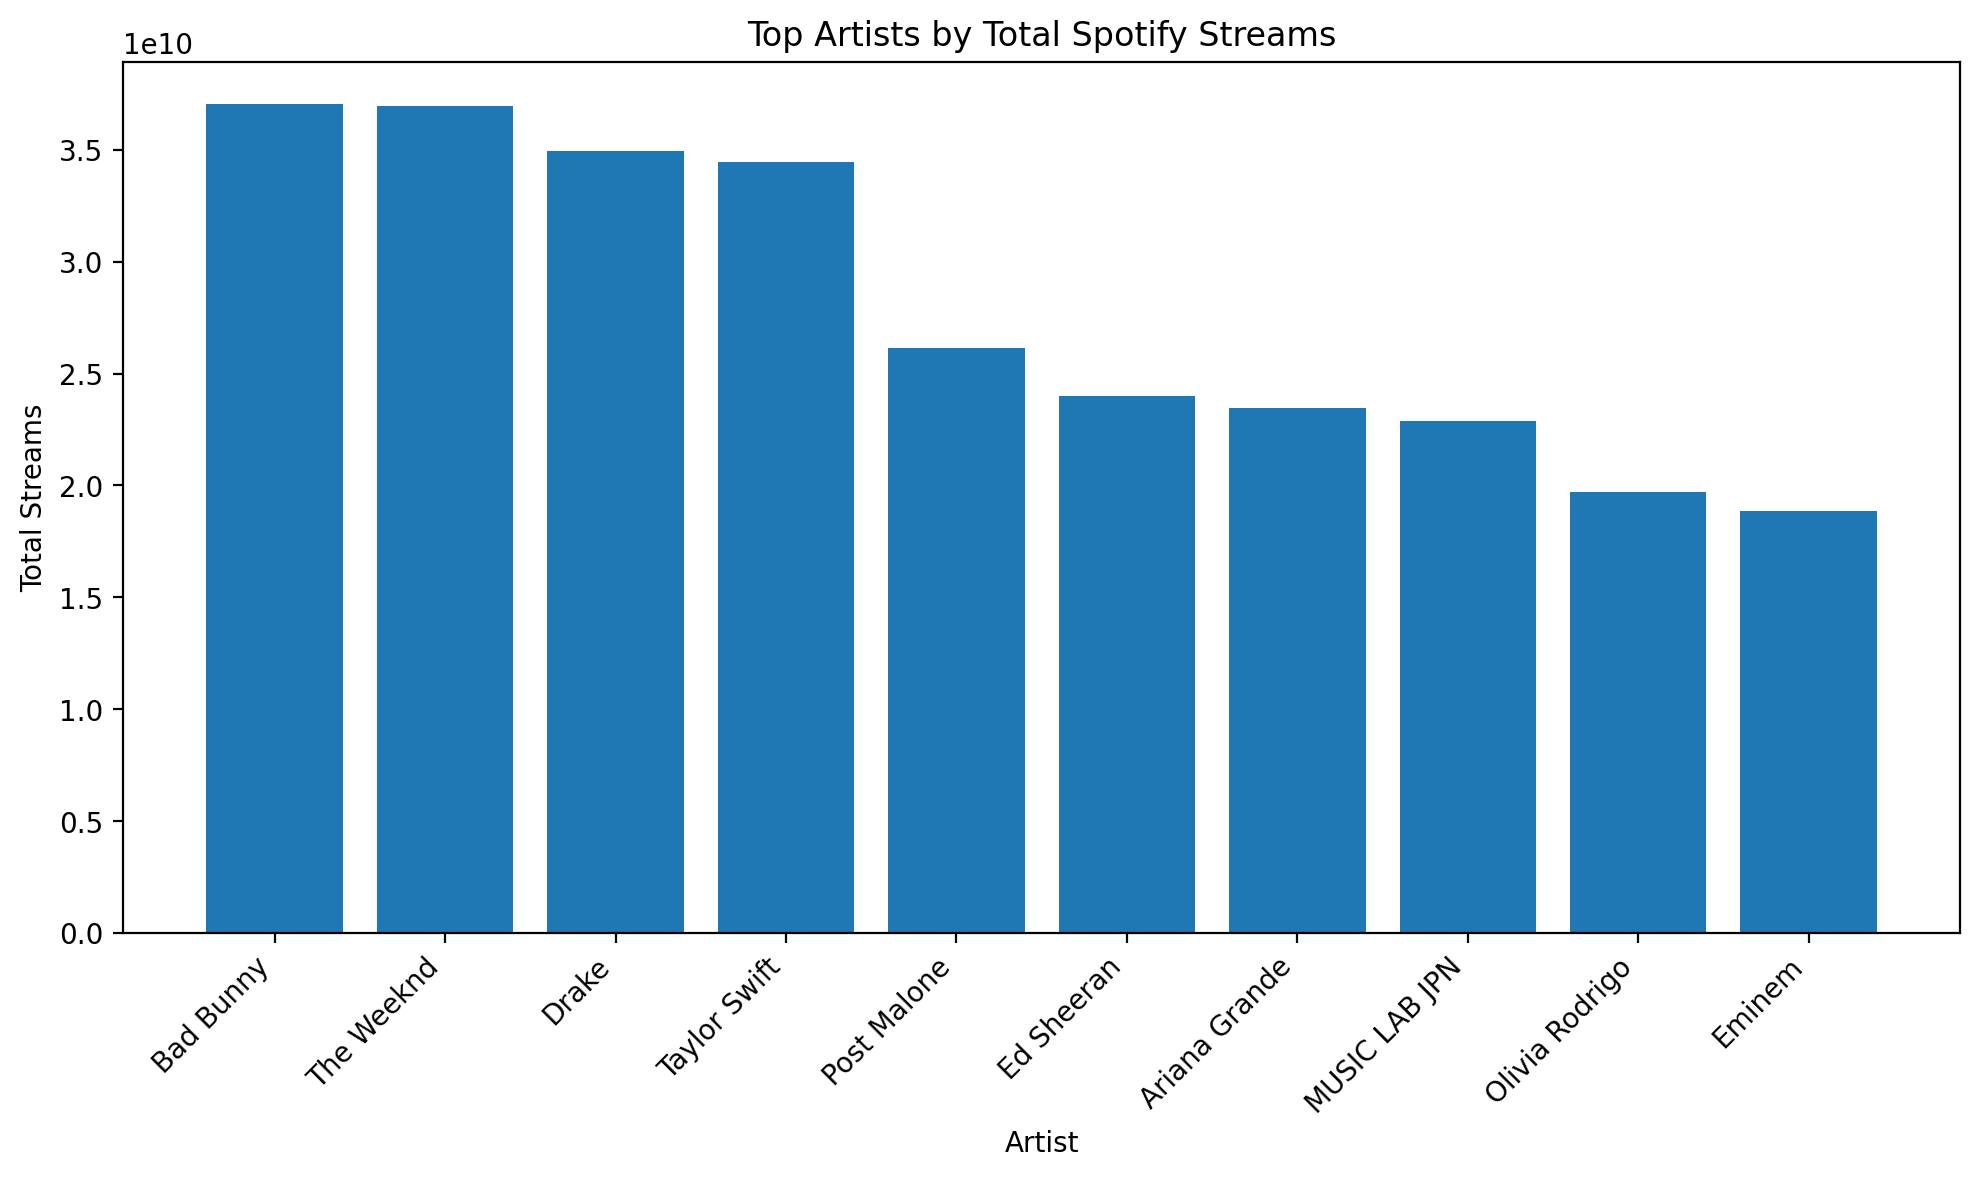

In [ ]:
data.columns

data["Artist"].unique()

data["Artist"].value_counts()       # counts per artist


artist_streams = data.groupby("Artist")["Spotify Streams"].sum().sort_values(ascending=False)

artist_streams_df = artist_streams.reset_index()
artist_streams_df.columns = ["Artist", "Total Streams"]


import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
top_n = 10  # show top 10 artists
plt.bar(artist_streams_df["Artist"][:top_n], artist_streams_df["Total Streams"][:top_n])
plt.xticks(rotation=45, ha='right')
plt.title("Top Artists by Total Spotify Streams")
plt.ylabel("Total Streams")
plt.xlabel("Artist")
plt.tight_layout()
plt.show()




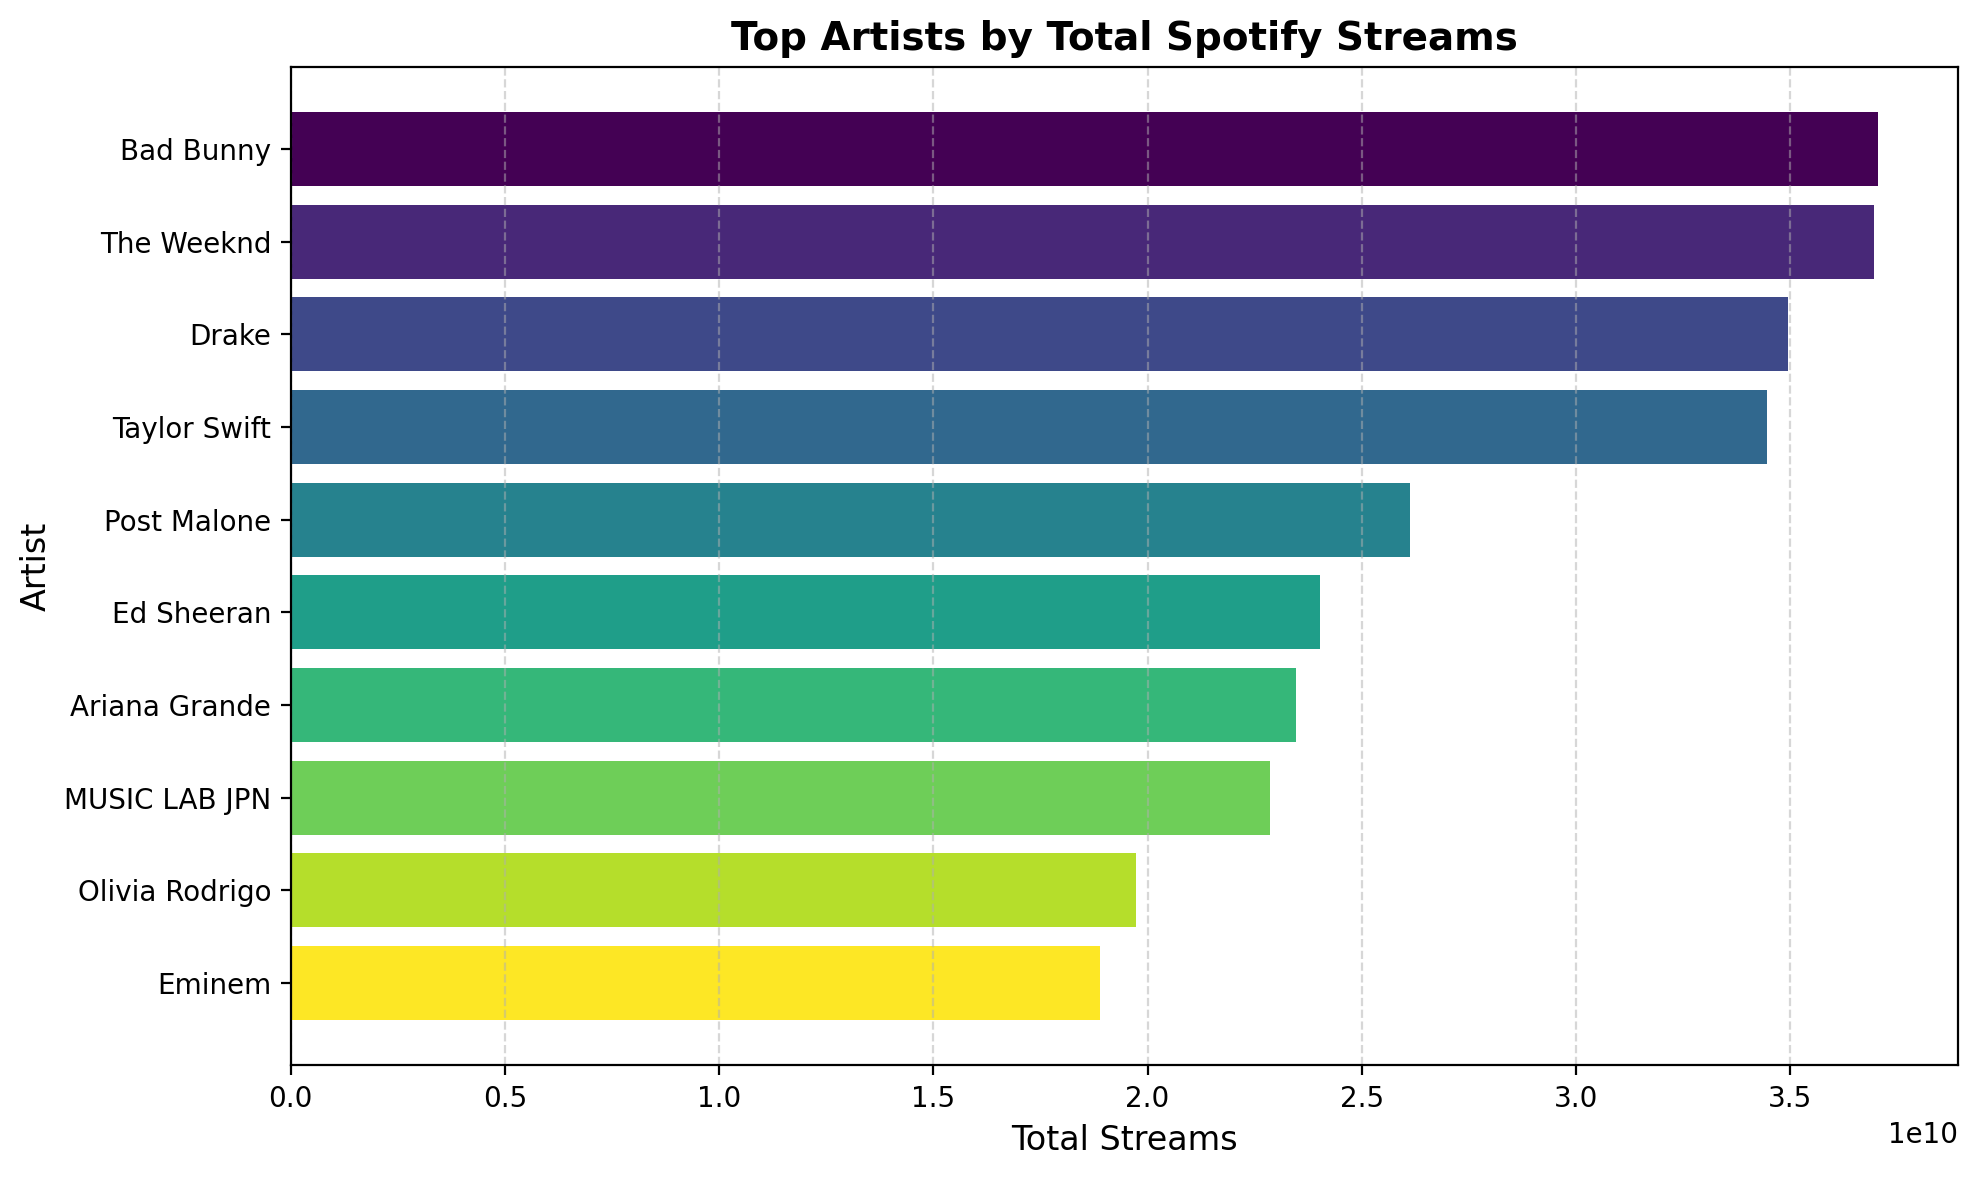

In [ ]:
import matplotlib.ticker as ticker

# Aggregate
artist_streams = (
    data.groupby("Artist")["Spotify Streams"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
artist_streams.columns = ["Artist", "Total Streams"]

# Visualization
plt.figure(figsize=(10, 6))
top_n = 10
colors = plt.cm.viridis(
    np.linspace(0, 1, top_n)
)  # Viridis colormap for nice gradient

plt.barh(
    artist_streams["Artist"][:top_n][::-1],
    artist_streams["Total Streams"][:top_n][::-1],
    color=colors[::-1],
)
plt.title("Top Artists by Total Spotify Streams", fontsize=14, weight="bold")
plt.xlabel("Total Streams", fontsize=12)
plt.ylabel("Artist", fontsize=12)

# Clean up look
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


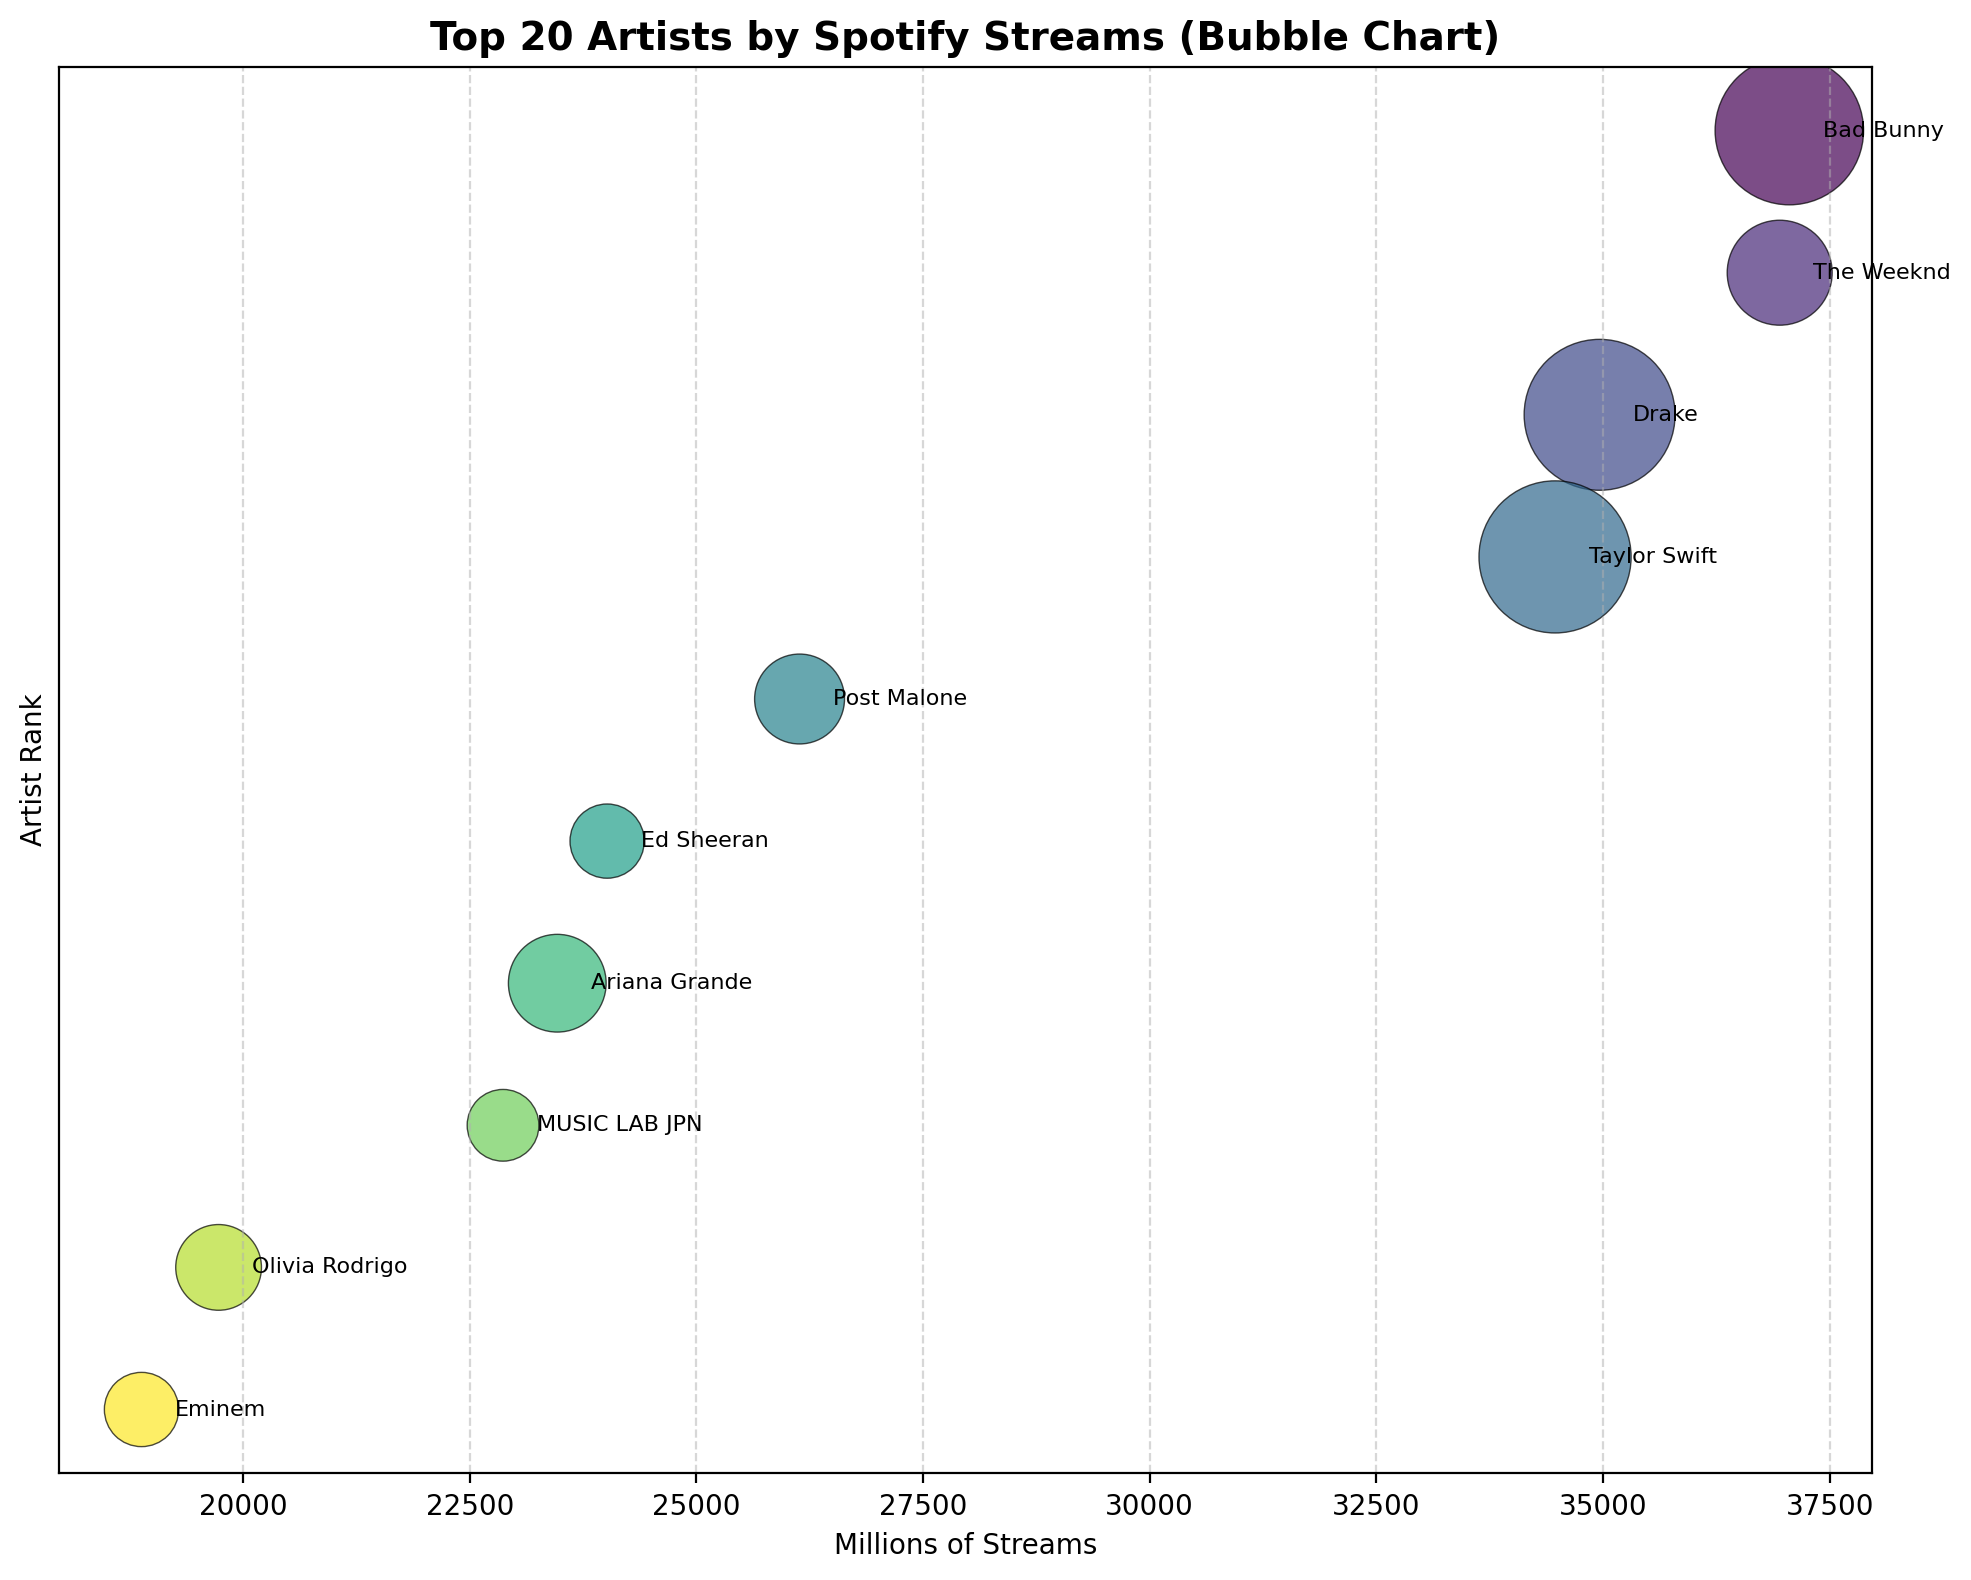

In [15]:

# Aggregate and filter top 20
artist_stats = (
    data.groupby("Artist")["Spotify Streams"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .head(10)
)
artist_stats.columns = ["Artist", "Total Streams"]

song_counts = data.groupby("Artist")["Spotify Streams"].count().reset_index()
song_counts.columns = ["Artist", "Song Count"]

# Merge with streams
artist_stats = artist_stats.merge(song_counts, on="Artist")

# Bubble size proportional to number of songs
bubble_size = artist_stats["Song Count"] / artist_stats["Song Count"].max() * 3000


# Colors
colors = plt.cm.viridis(np.linspace(0, 1, len(artist_stats)))

# Bubble chart (flipped axes)
plt.figure(figsize=(10, 8))
plt.scatter(
    y=np.arange(len(artist_stats)),
    x=artist_stats["Total Streams"],
    s=bubble_size,
    c=colors,
    alpha=0.7,
    edgecolors="black",
    linewidth=0.5
)

# Add labels next to bubbles
for i, artist in enumerate(artist_stats["Artist"]):
    plt.text(
        artist_stats["Total Streams"][i] + artist_stats["Total Streams"].max()*0.01,  
        i,
        artist,
        va="center",
        fontsize=8
    )

plt.title("Top 20 Artists by Spotify Streams (Bubble Chart)", fontsize=14, weight="bold")
plt.xlabel("Total Streams")
plt.ylabel("Artist Rank")
plt.yticks([])  # Hide numeric y-axis ticks
plt.grid(axis="x", linestyle="--", alpha=0.5)

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x / 1e6)}'))
plt.xlabel("Millions of Streams")
plt.gca().invert_yaxis()


plt.tight_layout()
plt.show()

# a big bubble = artist with many songs, small bubble = few songs but possibly high streams per song.




In [ ]:
# interactive bubble chart using Plotly!

# Aggregate stats for top 10 artists by total streams
artist_stats = (
    data.groupby("Artist")["Spotify Streams"]
    .agg(Total_Streams="sum", Song_Count="count")
    .reset_index()
    .sort_values("Total_Streams", ascending=False)
    .head(10)
)

# Get top 3 songs for each artist
top_songs = (
    data.sort_values(["Artist", "Spotify Streams"], ascending=[True, False])
    .groupby("Artist")
    .head(3)
    .groupby("Artist")["Track"]
    .apply(lambda tracks: ",<br> ".join(tracks))
    .reset_index()
    .rename(columns={"Track": "Top 3 Songs"})
)

# Merge songs info with stats
artist_stats = artist_stats.merge(top_songs, on="Artist")

# Convert total streams to millions for nicer axis
artist_stats["Total_Streams"] = artist_stats["Total_Streams"] / 1e6

# Plotly bubble chart
fig = px.scatter(
    artist_stats,
    x="Total_Streams",
    y="Song_Count",
    size="Song_Count",
    color="Artist",
    hover_name="Artist",
    hover_data={
        "Top 3 Songs": True,
        "Total_Streams": ":.0f",
        "Song_Count": True
    },
    size_max=60,
    title="Top 10 Artists by Number of Songs and Total Streams"
)

fig.update_layout(
    xaxis_title="Total Streams (in Millions)",
    xaxis=dict(
        title="Total Streams",
        tickformat=".0f",  # one decimal
        ticksuffix="M"     # adds 'M' to axis labels
    ),
    yaxis_title="Number of Songs by Artist",
    legend_title="Artist",
    template="plotly_white",


fig.update_traces(
    hovertemplate="<b>%{customdata[0]}</b><br>Total Streams: %{customdata[1]:.0f}M<br>Songs: %{customdata[2]}",
    customdata=artist_stats[["Artist", "Total_Streams", "Song_Count"]]
)

)


fig.show()



In [ ]:
# write plotly chart to html file to publish on blog
fig.write_html("artist_bubble_chart.html", include_plotlyjs="cdn")


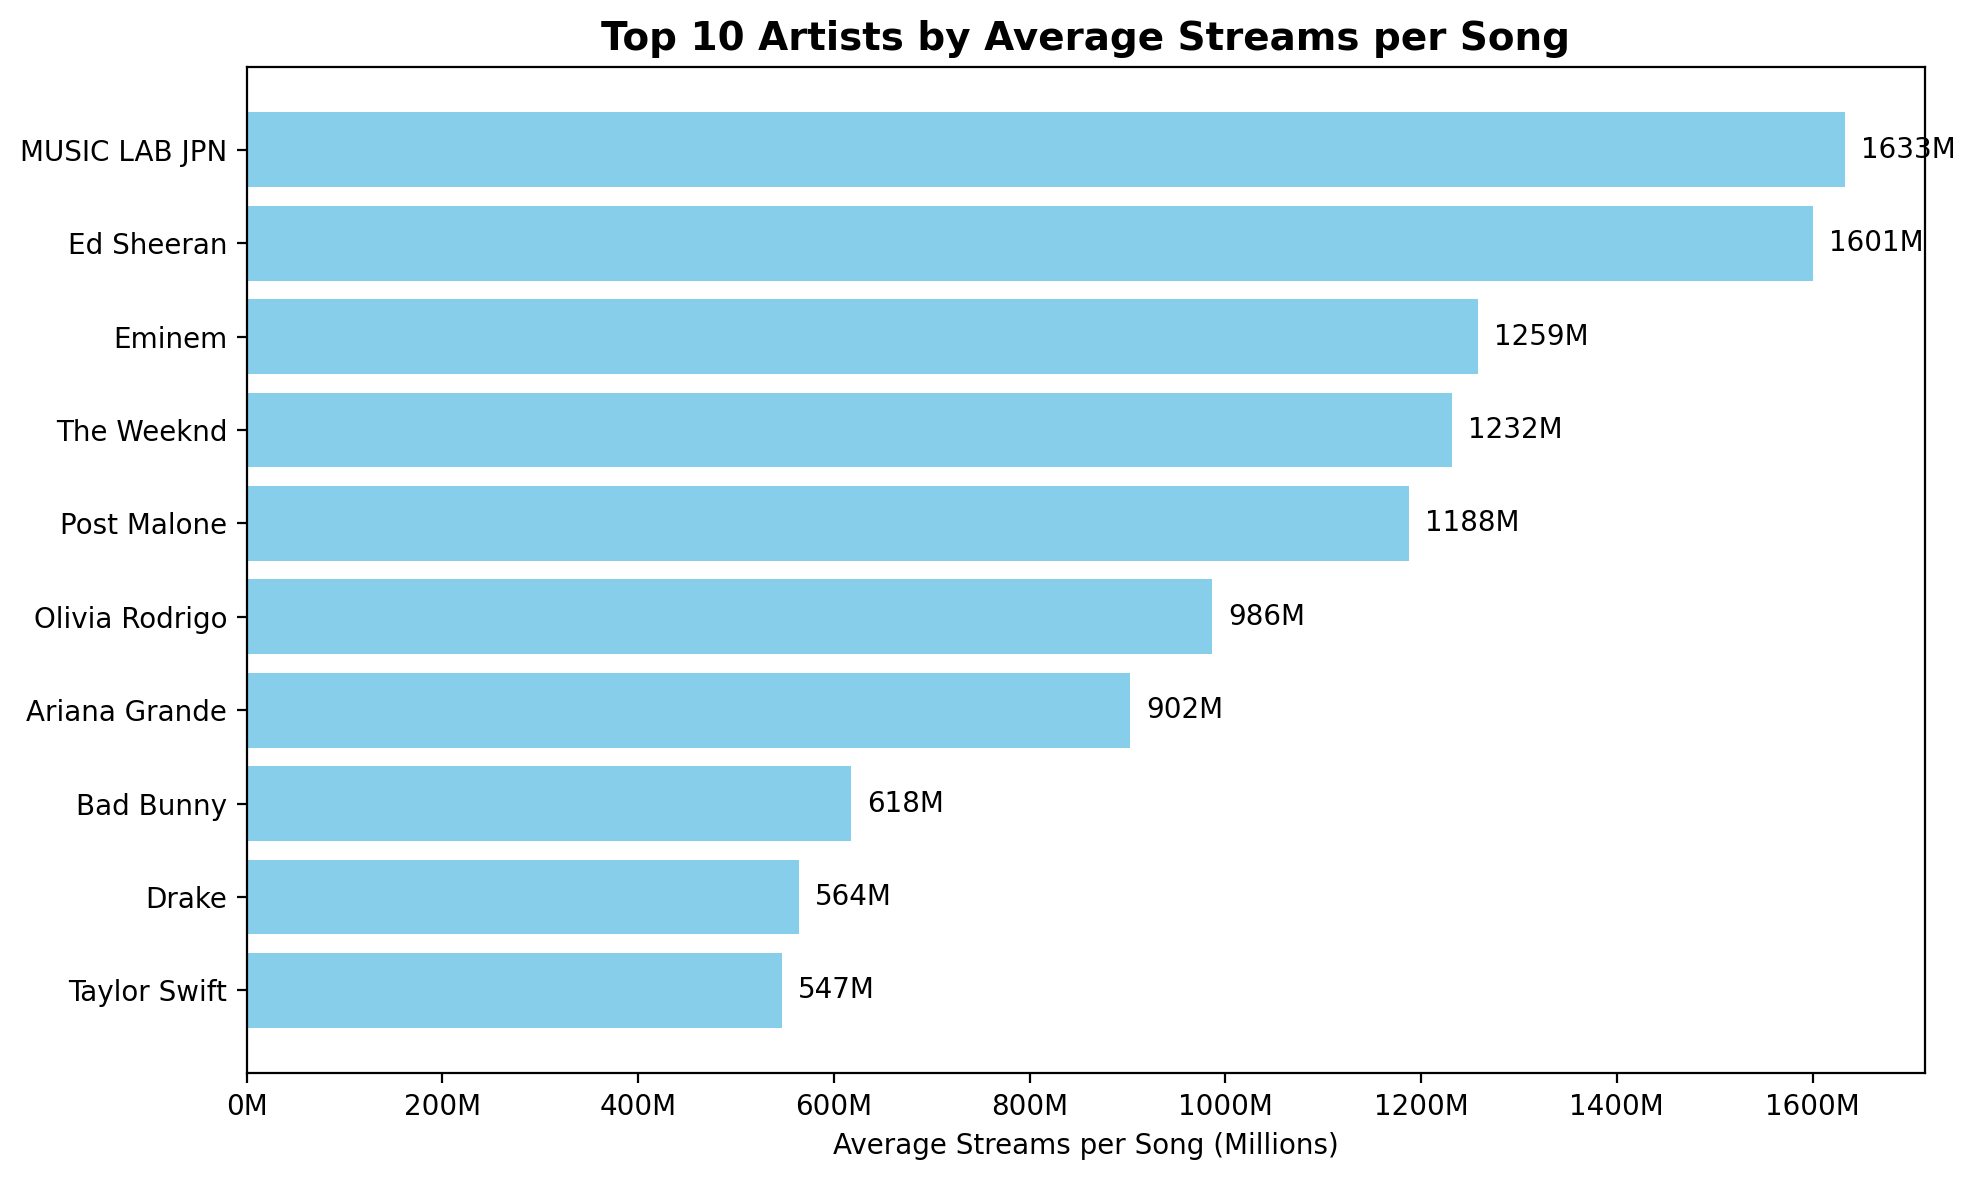

In [ ]:
# Aggregate total streams and count songs
artist_stats = (
    data.groupby("Artist")["Spotify Streams"]
    .agg(Total_Streams="sum", Song_Count="count")
    .reset_index()
)

# Filter top 10 by total streams
top10 = artist_stats.sort_values("Total_Streams", ascending=False).head(10)

# Calculate average streams per song
top10["Avg_Streams_per_Song"] = top10["Total_Streams"] / top10["Song_Count"]

# Sort by average streams per song
top10 = top10.sort_values("Avg_Streams_per_Song", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(top10["Artist"], top10["Avg_Streams_per_Song"], color="skyblue")

# Add value labels
for bar in bars:
    plt.text(
        bar.get_width() + top10["Avg_Streams_per_Song"].max() * 0.01,
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width()/1e6:.0f}M',
        va="center"
    )

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))
plt.xlabel("Average Streams per Song (Millions)")
plt.title("Top 10 Artists by Average Streams per Song", fontsize=14, weight="bold")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [10]:
# Define columns of interest
social_cols = [
    'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes',
    'TikTok Views', 'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
    'Deezer Playlist Count', 'Deezer Playlist Reach',
    'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
    'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity'
]
target_col = 'Spotify Streams'


In [11]:
# Basic info
print(data[social_cols + [target_col]].describe().T)

                             count       mean        std  min   25%   50%  \
Apple Music Playlist Count  4039.0  54.603120  71.612270  1.0  10.0  28.0   
Deezer Playlist Count       3679.0  32.310954  54.274538  1.0   5.0  15.0   
Amazon Playlist Count       3545.0  25.348942  25.989826  1.0   8.0  17.0   
TIDAL Popularity               0.0        NaN        NaN  NaN   NaN   NaN   

                             75%    max  
Apple Music Playlist Count  70.0  859.0  
Deezer Playlist Count       37.0  632.0  
Amazon Playlist Count       34.0  210.0  
TIDAL Popularity             NaN    NaN  


In [12]:
# Check missing values
print("\nMissing values:")
print(data[social_cols + [target_col]].isna().sum())


Missing values:
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Spotify Streams                113
dtype: int64


In [13]:
# data cleaning stuff

# Convert numeric columns to proper numeric types
numeric_cols = [
    'Spotify Streams', 'YouTube Views', 'YouTube Likes',
    'TikTok Posts', 'TikTok Likes', 'TikTok Views',
    'YouTube Playlist Reach'
]

for col in numeric_cols:
    data[col] = pd.to_numeric(data[col].astype(str).str.replace(',', ''), errors='coerce')


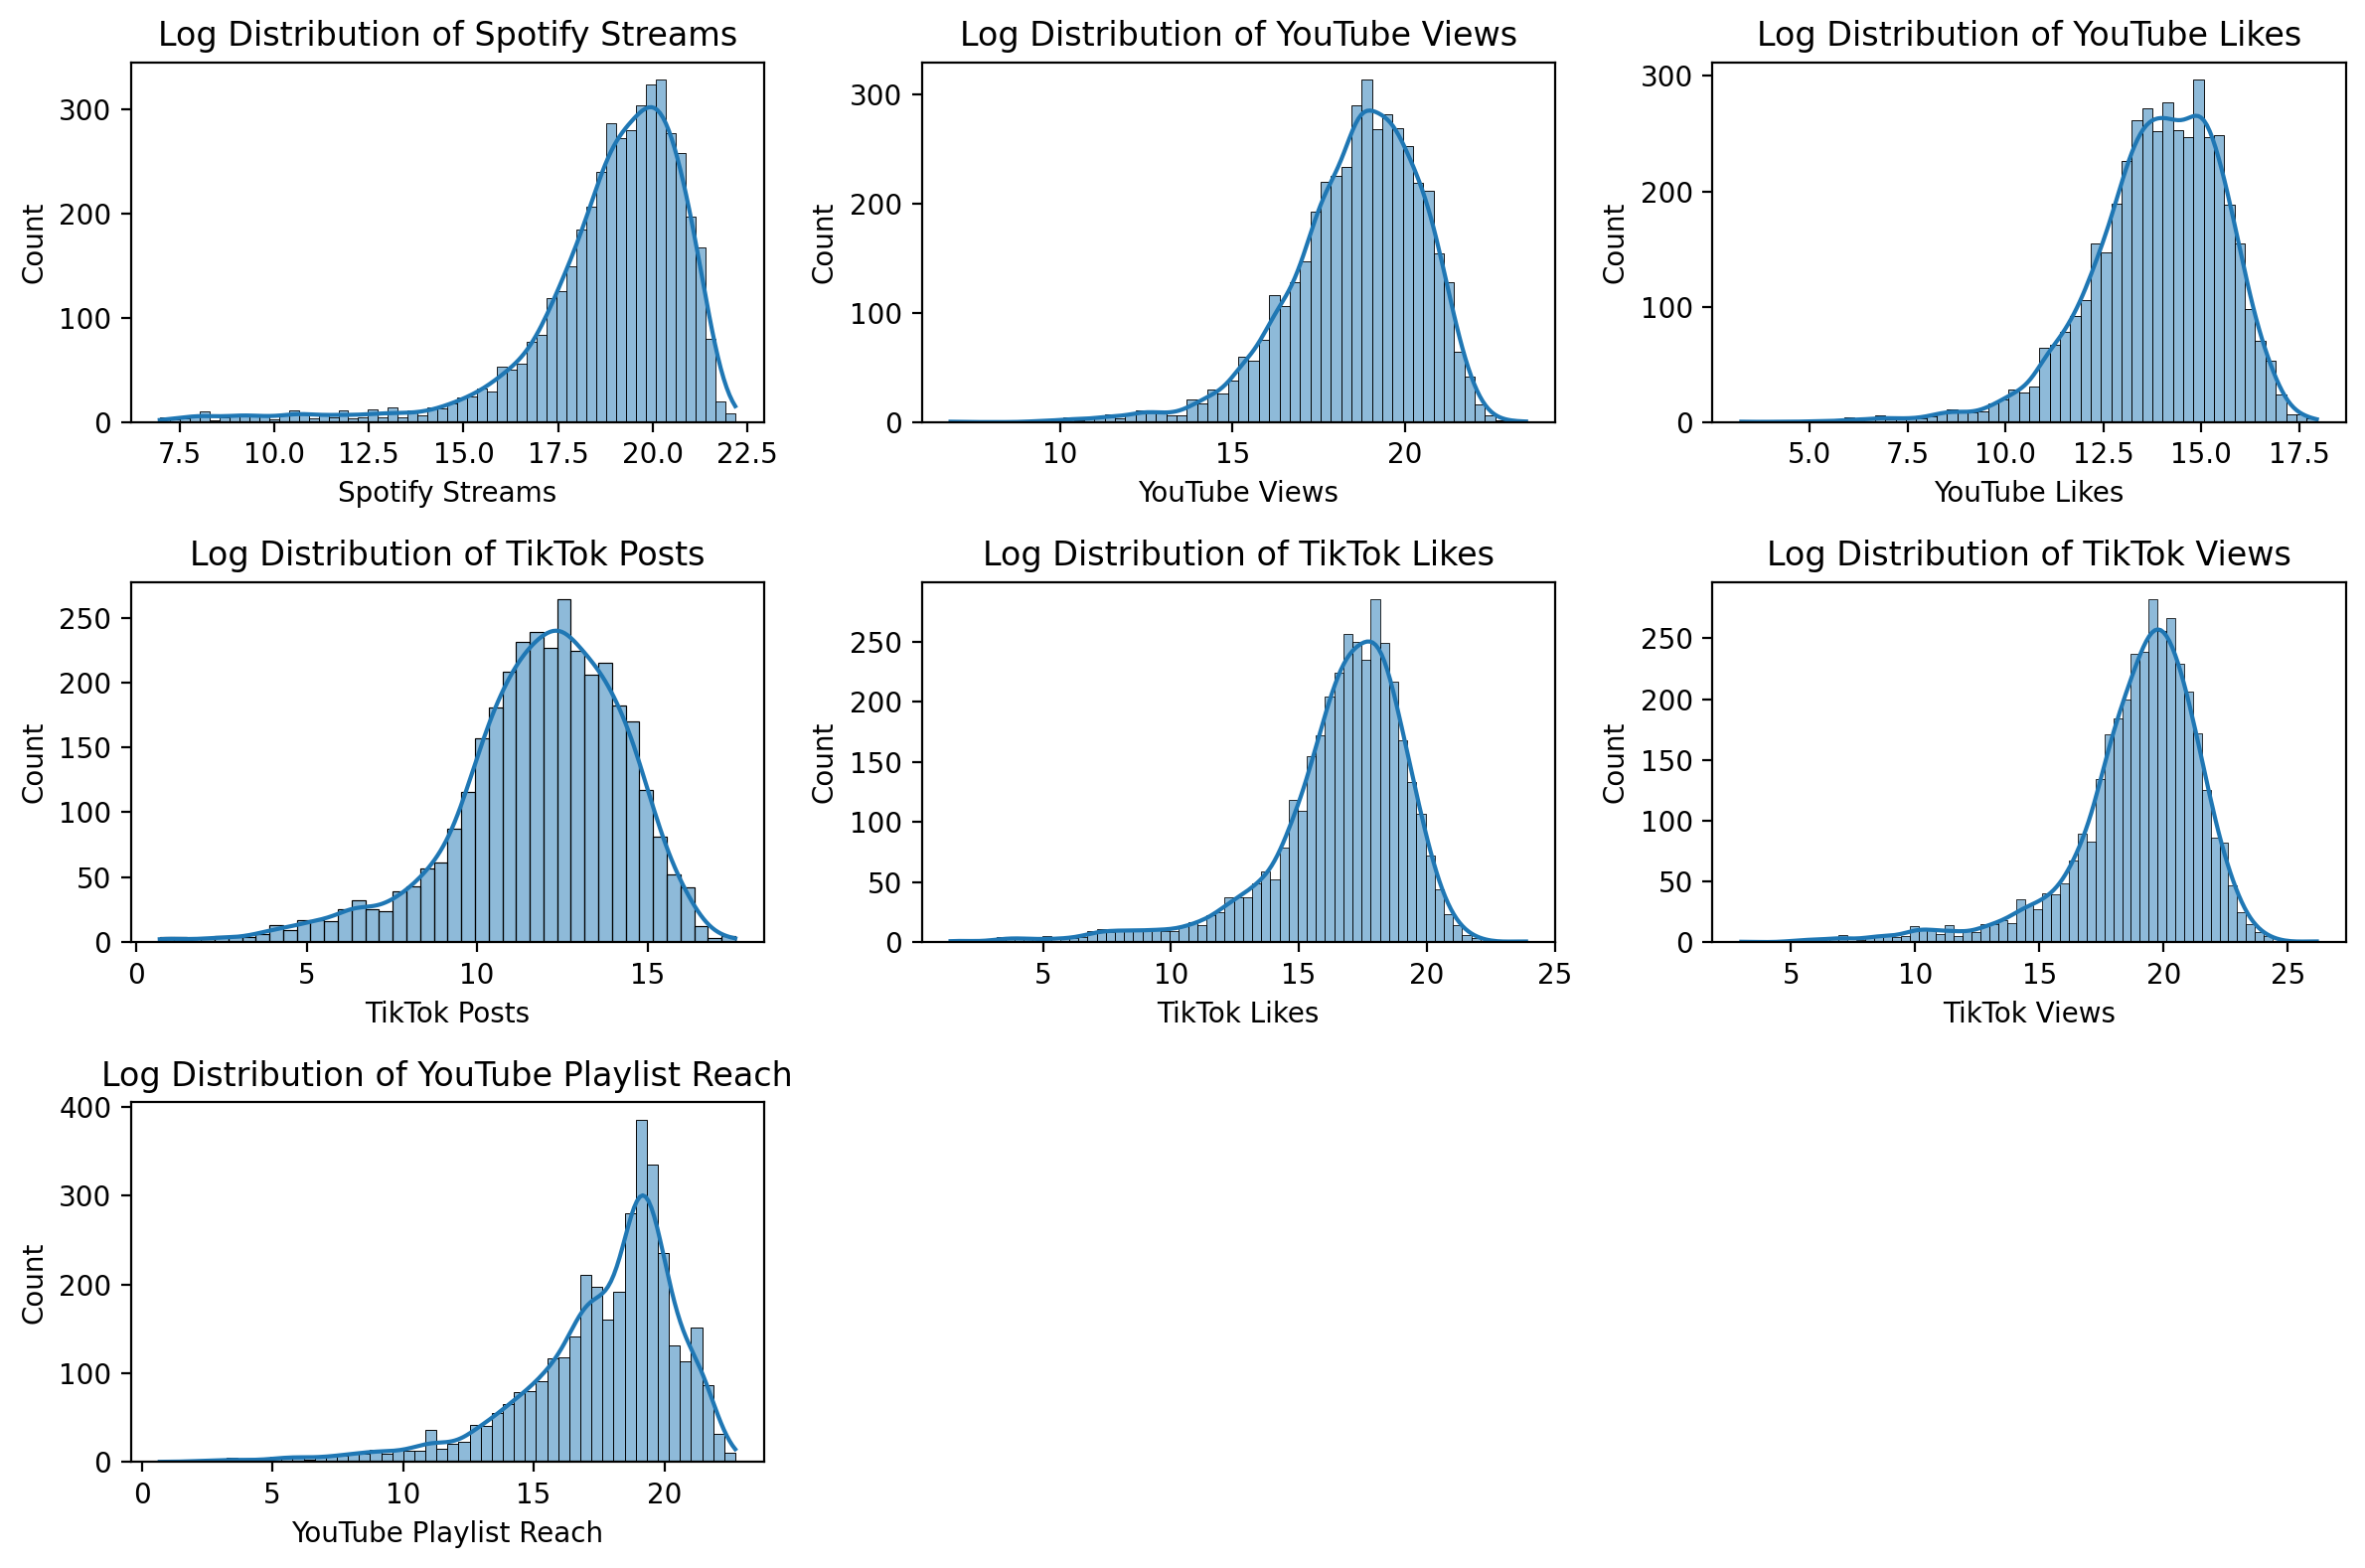

In [ ]:
# Histogram of streams & social metrics (log scale to reveal distribution, account for extreme outliers)
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(np.log1p(data[col].dropna()), kde=True)
    plt.title(f"Log Distribution of {col}")
plt.tight_layout()
plt.show()

Story angle: Most songs have small social reach; a few viral hits dominate. ?

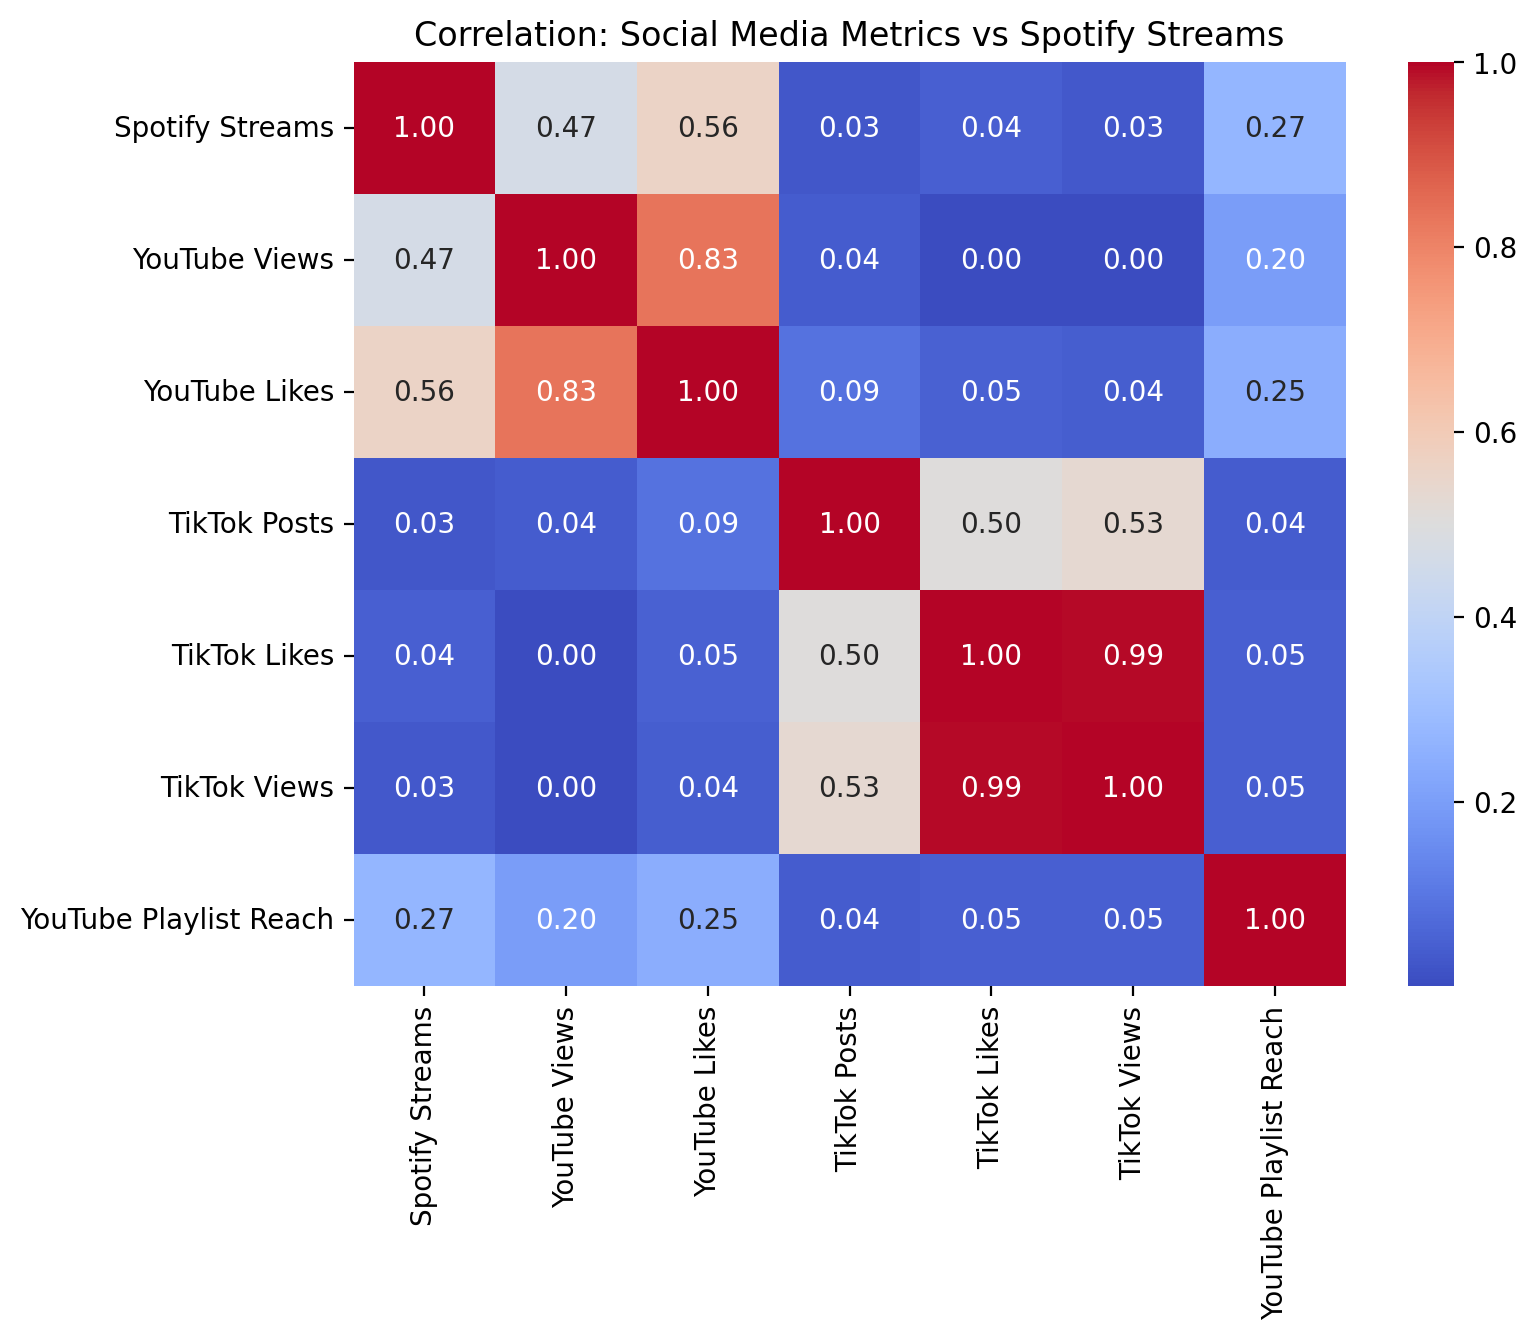

In [ ]:
corr = data[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation: Social Media Metrics vs Spotify Streams")
plt.show()


Which platform’s activity tracks most with streams? (e.g., TikTok Views might show stronger correlation than YouTube Likes)

/opt/anaconda3/envs/eda/lib/python3.11/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/opt/anaconda3/envs/eda/lib/python3.11/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/opt/anaconda3/envs/eda/lib/python3.11/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)


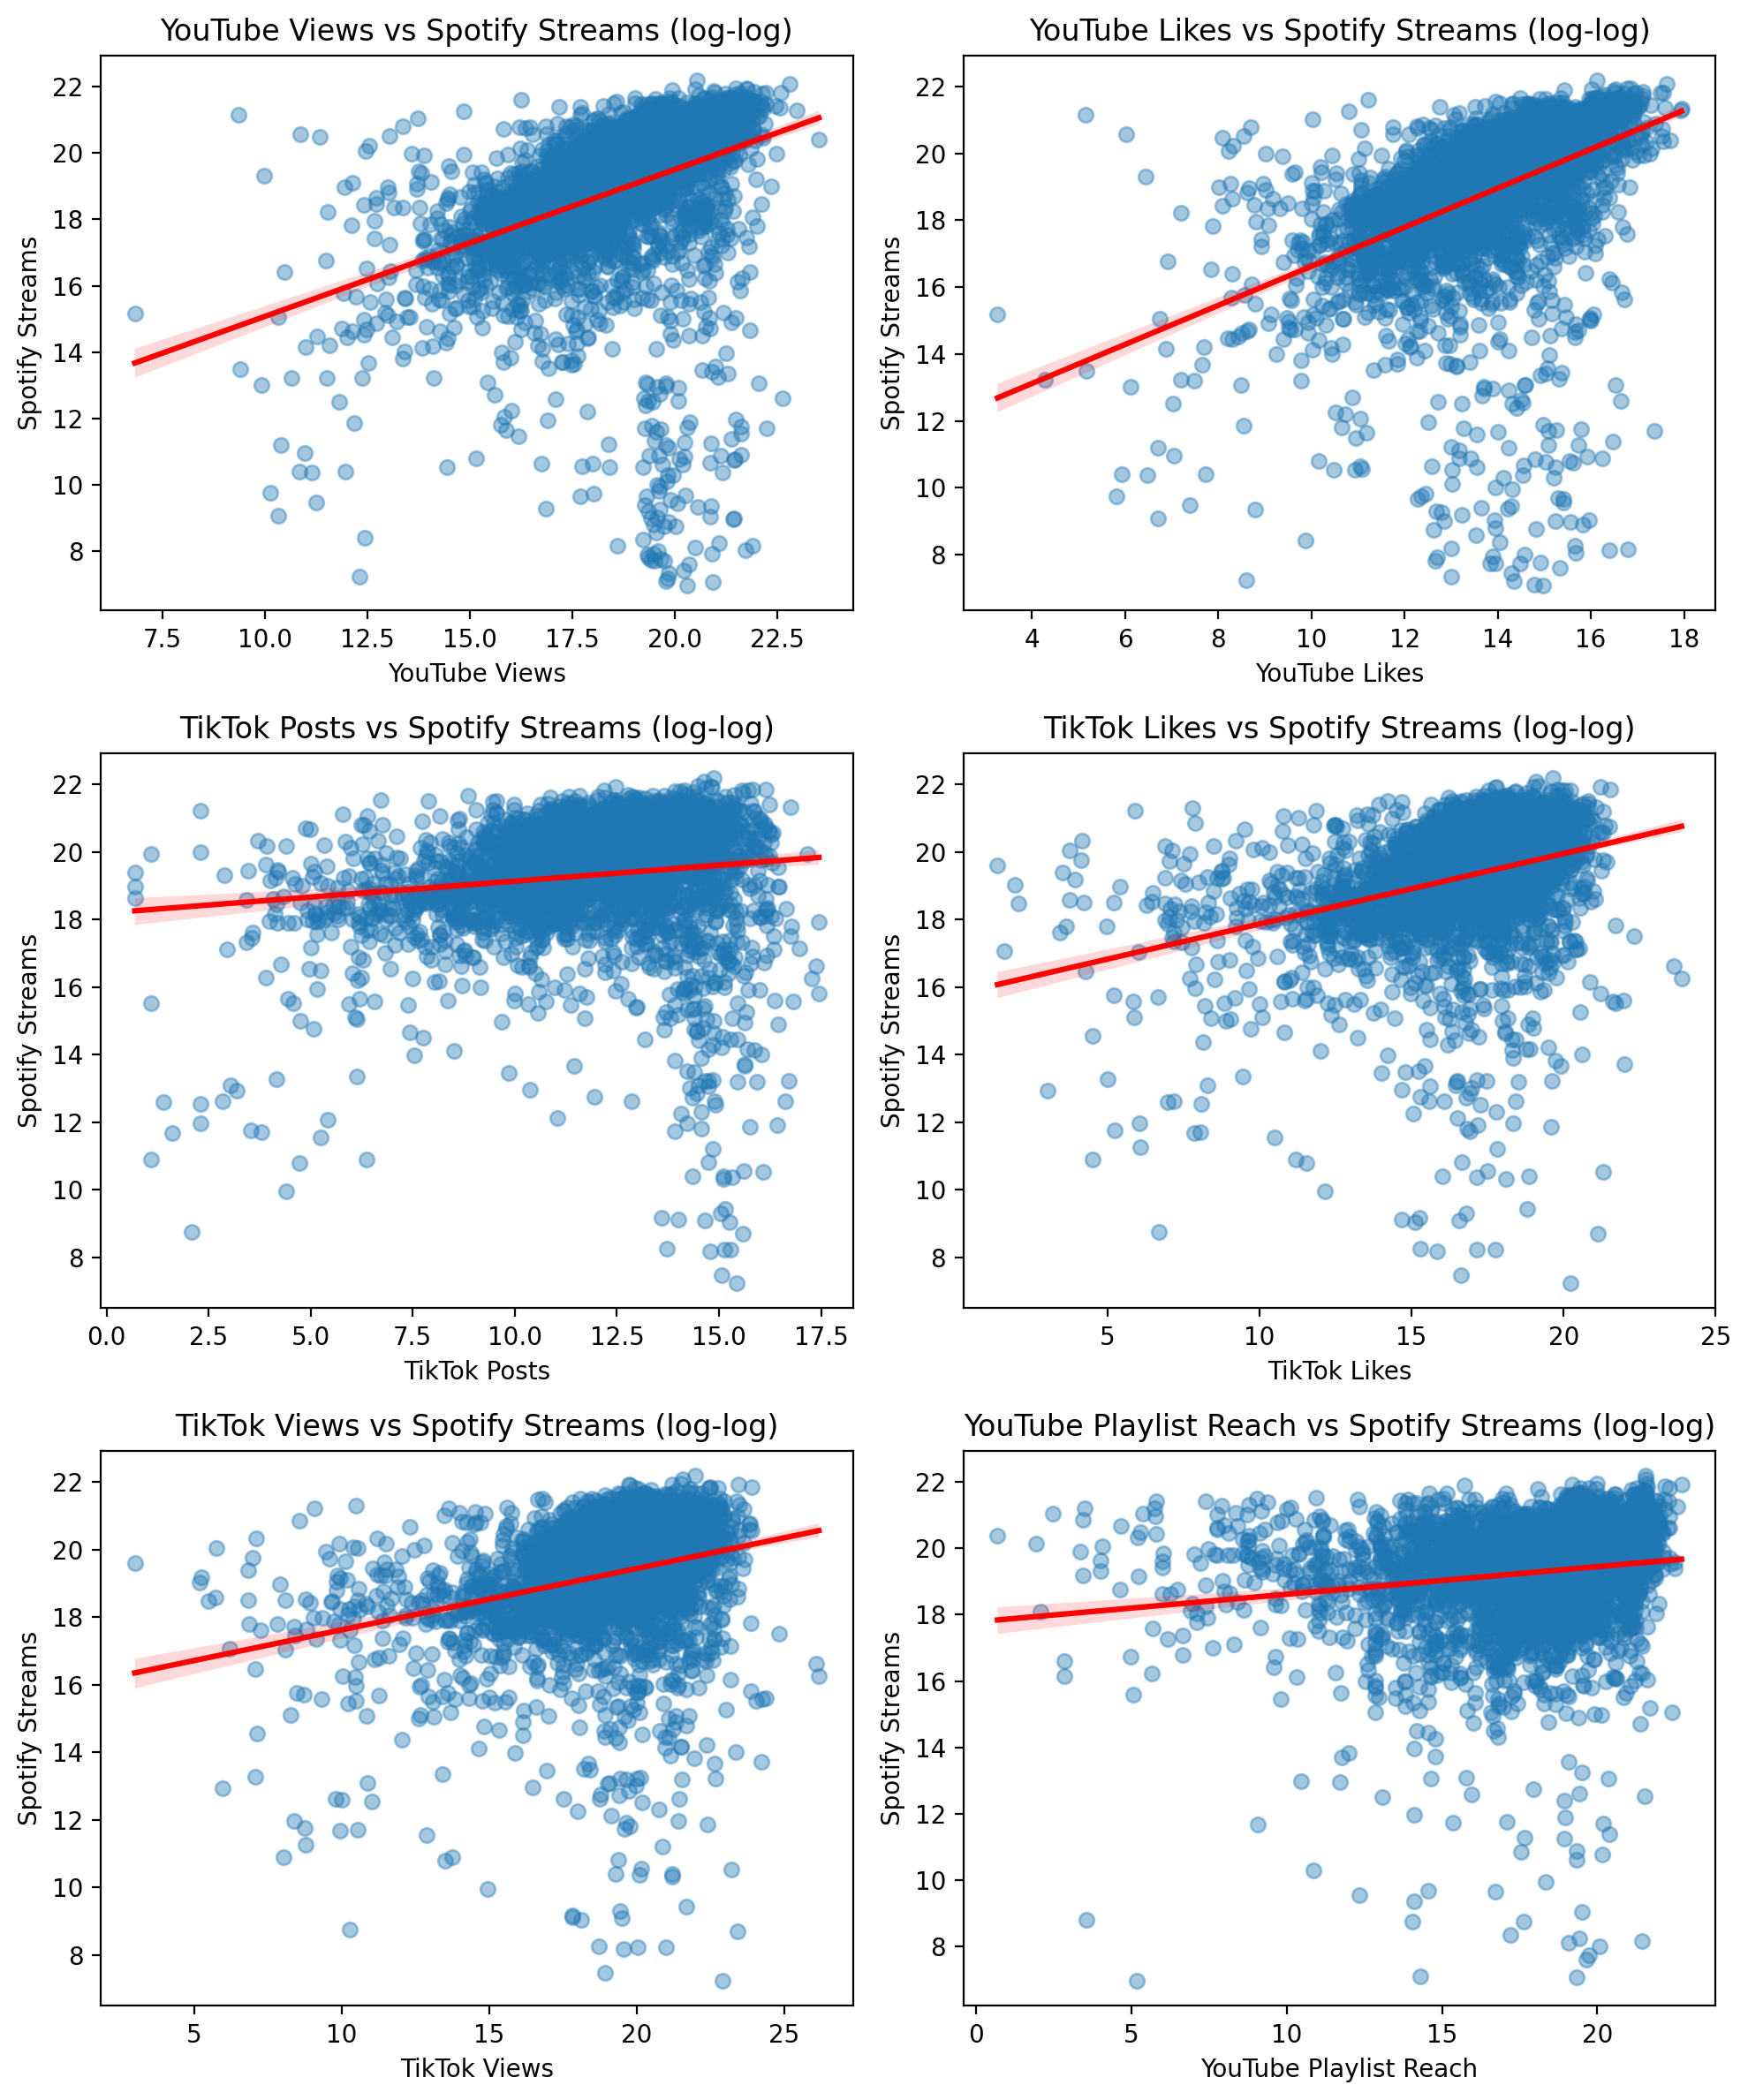

In [ ]:
plt.figure(figsize=(10, 12))
for i, col in enumerate(numeric_cols[1:]):  # skip 'Spotify Streams'
    plt.subplot(3, 2, i+1)
    sns.regplot(
        x=np.log1p(data[col]),
        y=np.log1p(data['Spotify Streams']),
        scatter_kws={'alpha':0.4}, line_kws={'color':'red'}
    )
    plt.title(f"{col} vs Spotify Streams (log-log)")
plt.tight_layout()
plt.show()


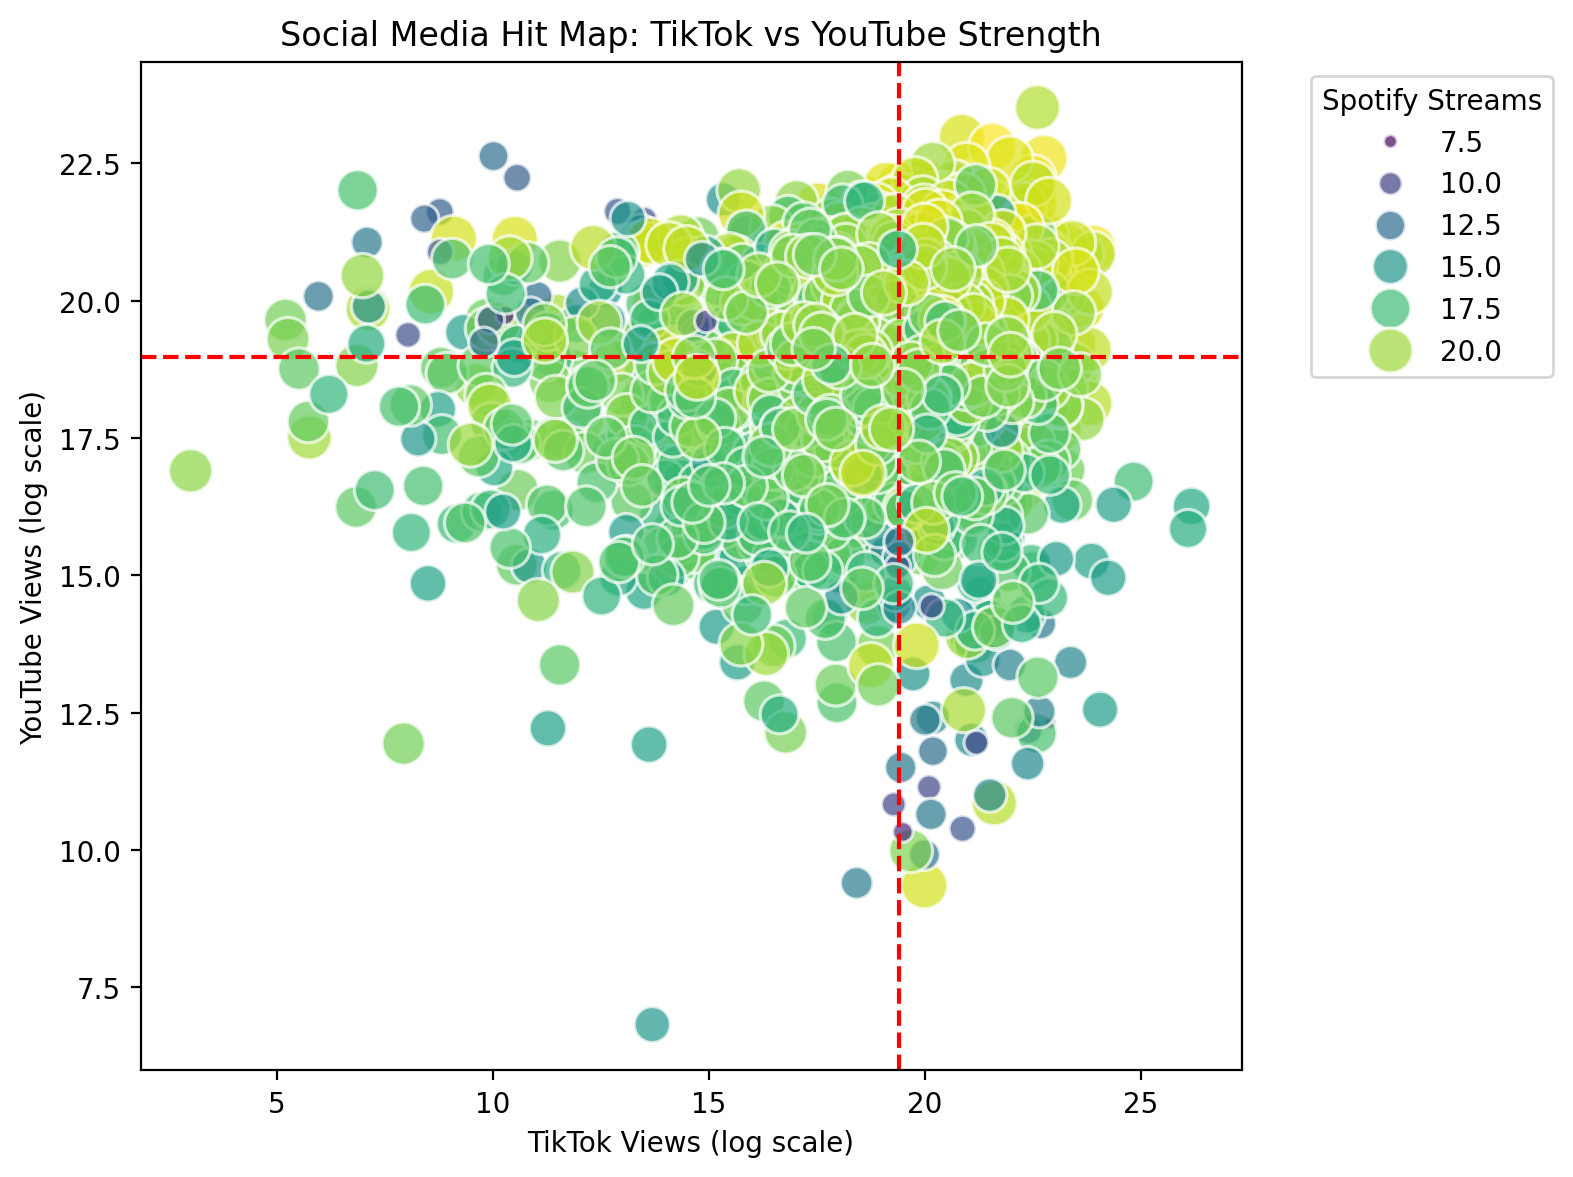

In [ ]:
# Select relevant metrics from your dataframe
map_df = data[['Spotify Streams', 'YouTube Views', 'TikTok Views']].copy()

# Convert to numeric (just in case)
for col in map_df.columns:
    map_df[col] = pd.to_numeric(map_df[col].astype(str).str.replace(',', ''), errors='coerce')

# Drop rows with missing values
map_df = map_df.dropna()

# Log-transform to handle skew
map_df_log = map_df.apply(lambda x: np.log1p(x))

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=map_df_log['TikTok Views'],
    y=map_df_log['YouTube Views'],
    size=map_df_log['Spotify Streams'],
    hue=map_df_log['Spotify Streams'],
    sizes=(20, 300),
    palette="viridis",
    alpha=0.7
)

# Add quadrant lines at medians
plt.axvline(map_df_log['TikTok Views'].median(), color='red', linestyle='--')
plt.axhline(map_df_log['YouTube Views'].median(), color='red', linestyle='--')

# Labels & title
plt.xlabel("TikTok Views (log scale)")
plt.ylabel("YouTube Views (log scale)")
plt.title("Social Media Hit Map: TikTok vs YouTube Strength")
plt.legend(title="Spotify Streams", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Narrative hook: Some tracks have low TikTok but high streams (organic Spotify success), others have high TikTok but moderate streams (platform-specific virality).

Virality impact?
Story angle: TikTok might show steep slope (virality impact), YouTube may show long-tail support.

Potential Storylines
TikTok as a Launchpad: High correlation between TikTok Views/Posts and streaming spikes for mid-ranked songs.

YouTube as Sustainer: Views and playlist reach correlate with long-term streams, even for lower-ranked tracks.

Virality Threshold: Most songs have negligible social impact; only a few break out (power-law distribution).

Multi-platform synergy: Tracks with activity across TikTok + YouTube show higher-than-average streams than single-platform hits.

In [ ]:
## linear regression model

import statsmodels.api as sm

# Columns for regression
features = [
    'YouTube Views', 'YouTube Likes',
    'TikTok Posts', 'TikTok Likes', 'TikTok Views'
]

# Clean numeric values (if not already)
for col in features + ['Spotify Streams']:
    data[col] = pd.to_numeric(data[col].astype(str).str.replace(',', ''), errors='coerce')

# Drop rows with missing values
df_reg = data[features + ['Spotify Streams']].dropna()

# Log-transform
df_log = np.log1p(df_reg)

# Prepare X and y
X = df_log[features]
y = df_log['Spotify Streams']

# Add constant for intercept
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

# Summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        Spotify Streams   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     519.6
Date:                Thu, 31 Jul 2025   Prob (F-statistic):               0.00
Time:                        22:24:06   Log-Likelihood:                -5208.9
No. Observations:                3307   AIC:                         1.043e+04
Df Residuals:                    3301   BIC:                         1.047e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.9638      0.345     28.916